## Display the xml element tree

In [1]:
from pptlayout.extractors.run_extractors import run_extractors
from json import dumps
# Replace with your actual PPTX file path
pptx_path = "/data/tianyuhu/PPTLayout/data/pptx/ZK7FNUZ33GBBCG7CFVYS56TQCTD72CJR.pptx"

# Run extractors
info = run_extractors(pptx_path, "emu")
print(dumps(info, indent=4))

{
    "slide_width": 9144000,
    "slide_height": 6858000,
    "slides": [
        {
            "slide_id": 256,
            "slide_name": "",
            "shapes": [
                {
                    "name": "PlaceHolder 1",
                    "shape_id": 22,
                    "shape_type": "PLACEHOLDER",
                    "measurement_unit": "emu",
                    "height": 2228760,
                    "width": 7772400,
                    "left": 685800,
                    "top": 1371240,
                    "text": "Design for a 2 MW graphite target\u000b\u000bfor a neutrino beam",
                    "placeholder_type": "TITLE"
                },
                {
                    "name": "PlaceHolder 2",
                    "shape_id": 23,
                    "shape_type": "PLACEHOLDER",
                    "measurement_unit": "emu",
                    "height": 1752480,
                    "width": 8153640,
                    "left": 380520,
                 

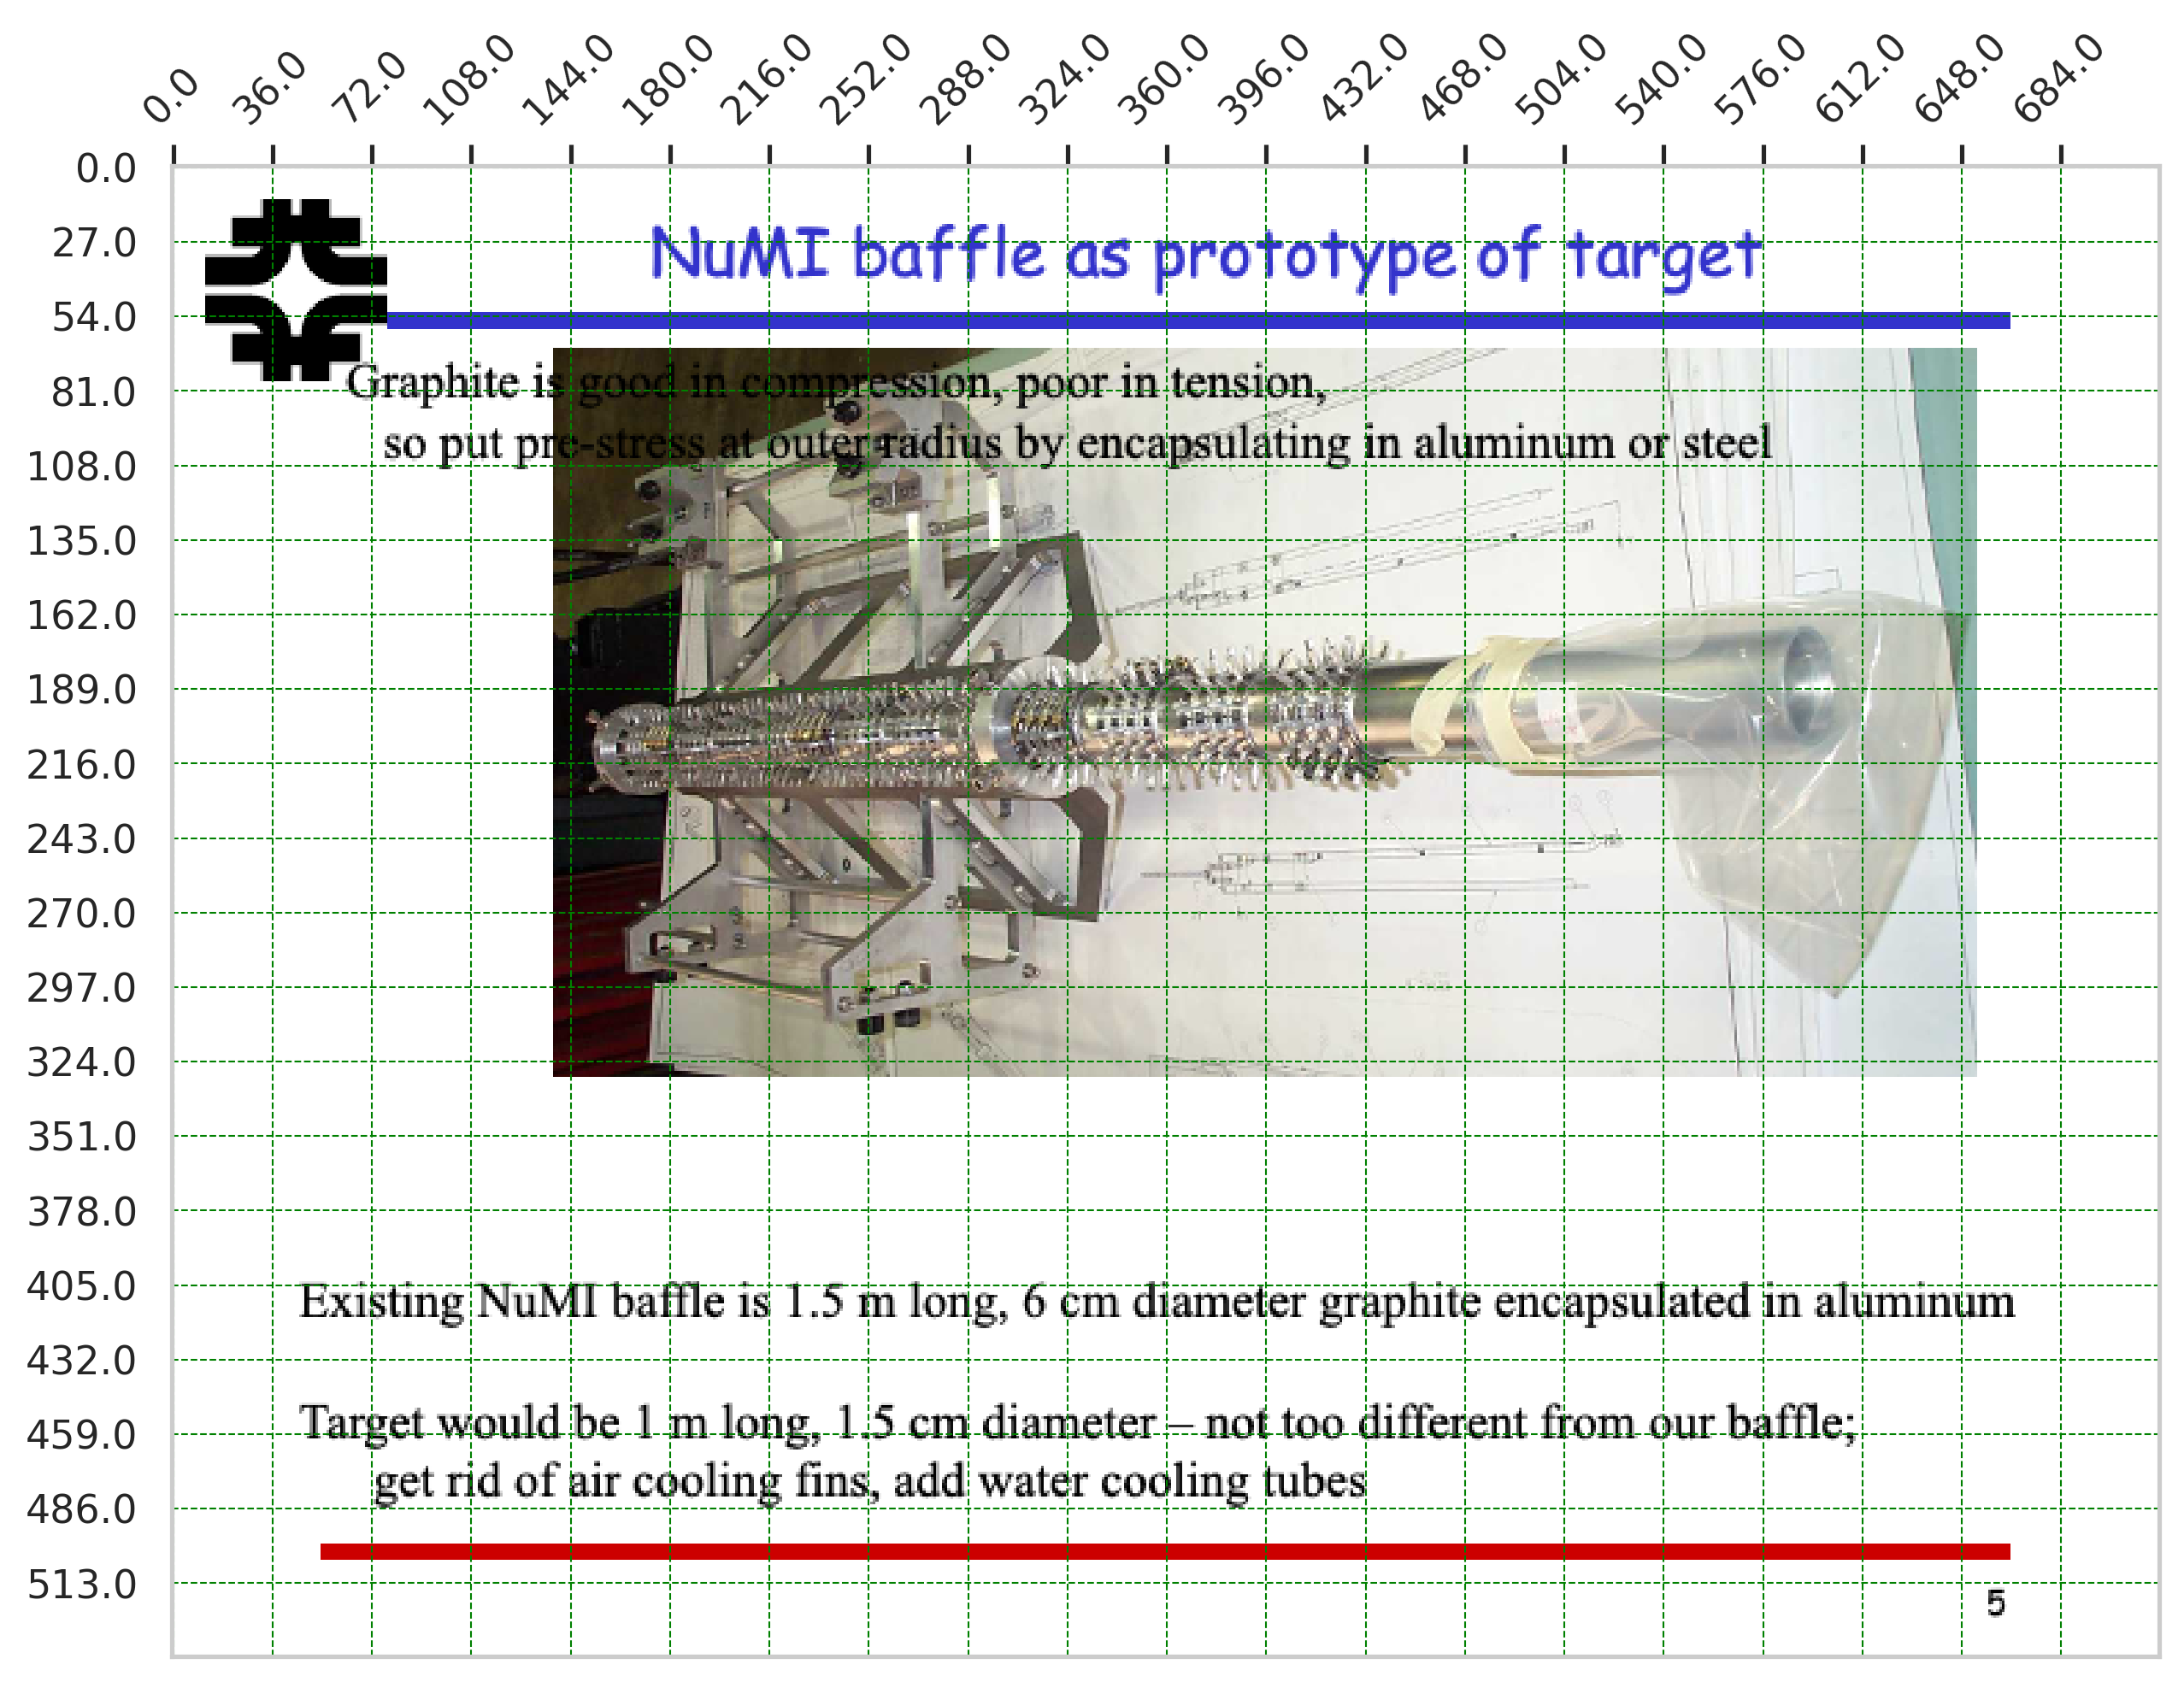

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
# Load the image using OpenCV
image_path = '/data/tianyuhu/PPTLayout/notebooks/test_input/image.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display

image_width = image.shape[1]
image_height = image.shape[0]

slide_width = 720
slide_height = 540
scale_x = slide_width / image_width
scale_y = slide_height / image_height

# Create a figure and display the image
fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
ax.imshow(image)

# Overlay grids
ax.grid(color='green', linestyle='--', linewidth=0.5)  # Customize grid color and style
interval_num = 20
x_tick_interval = image_width // interval_num
y_tick_interval = image_height // interval_num

# Customize axis ticks and labels
# Set the tick positions based on the image size
ax.set_xticks(np.arange(0, image_width, x_tick_interval))
ax.set_yticks(np.arange(0, image_height, y_tick_interval))

# Set tick labels based on the slide size
ax.set_xticklabels(np.round(np.arange(0, slide_width, x_tick_interval * scale_x), 2))
ax.set_yticklabels(np.round(np.arange(0, slide_height, y_tick_interval * scale_y), 2))
ax.xaxis.tick_top()

# Set the ticks on the horizontal axis to 45 degrees
plt.xticks(rotation=45)

# Show axes
ax.set_axis_on()
plt.savefig('/data/tianyuhu/PPTLayout/notebooks/test_input/image_grid.png')

# Display the image with the overlay
plt.show()


## test

In [3]:
from pptlayout.extractors.run_extractors import run_extractors
# Replace with your actual PPTX file path
pptx_path = "/data/tianyuhu/PPTLayout/data/pptx/ZK7FNUZ33GBBCG7CFVYS56TQCTD72CJR.pptx"

# Run extractors
info = run_extractors(pptx_path, "pt")
# print(dumps(info, indent=4))


from pptlayout.llm.call_ollama import generate_slide_layout
from pptlayout.llm.prompts import build_slide_layout_suggestion_prompts
test_image = "/data/tianyuhu/PPTLayout/notebooks/test_input/image_grid.png"
prompt = "What can be improved in the layout of the slide and how? Give me some specific suggestions on how to improve the layout of the slide."

suggestion = generate_slide_layout(
    model_name="llama3.2-vision:11b",
    prompt=prompt,
    images=[test_image],
    # json=True,
    ) 
print(suggestion)
print("#" * 50)
prompt = build_slide_layout_suggestion_prompts(
    json_input=info["slides"][4],
    slide_width=info["slide_width"],
    slide_height=info["slide_height"],
    suggestion=suggestion,
    )
response = generate_slide_layout(
    model_name="llama3.2-vision:11b",
    prompt=prompt,
    images=[test_image],
    # json=True,
    )

The image presents a technical diagram, which is not an ideal format for conveying complex information effectively. The text's small font size and lack of clear headings make it challenging to comprehend.

**Improvement Suggestions:**

*   **Headings:** Incorporate headings at the top of each page or section to provide context and break up content into logical sections.
*   **Bullet Points:** Break down long paragraphs into bullet points to enhance readability.
*   **Font Size Adjustment:** Increase font size for easier reading.
*   **Alignment:** Ensure proper alignment of text and images within the diagram.

By implementing these improvements, the layout will become more user-friendly and effective in conveying complex information.
##################################################


In [4]:
print(response)

To improve the slide's readability, visual appeal, and overall coherence, we can make some adjustments to the layout. Here are the suggestions:

1.  **Headings:** Add headings at the top of each page or section to provide context and break up content into logical sections.
2.  **Bullet Points:** Break down long paragraphs into bullet points to enhance readability.
3.  **Font Size Adjustment:** Increase font size for easier reading.
4.  **Alignment:** Ensure proper alignment of text and images within the diagram.

Based on these suggestions, here is the improved JSON format:

```json
{
    "slide_id": 260,
    "slide_name": "",
    "shapes": [
        {
            "name": "PlaceHolder 1",
            "shape_id": 38,
            "shape_type": "PLACEHOLDER",
            "measurement_unit": "pt",
            "height": 42.00944881889764,
            "width": 510.0094488188976,
            "left": 119.99055118110236,
            "top": 11.990551181102362,
            "text": "<h1>NuMI baffl

In [5]:
from pptlayout.llm.parser import extract_json
from json import dumps
# Extract JSON data
json_data = extract_json(response)
print(dumps(json_data, indent=4))

{     "slide_id": 260,     "slide_name": "",     "shapes": [         {             "name": "PlaceHolder 1",             "shape_id": 38,             "shape_type": "PLACEHOLDER",             "measurement_unit": "pt",             "height": 42.00944881889764,             "width": 510.0094488188976,             "left": 119.99055118110236,             "top": 11.990551181102362,             "text": "<h1>NuMI baffle as prototype of target</h1>",             "placeholder_type": "TITLE"         },         {             "name": "Rectangle 38",             "shape_id": 39,             "shape_type": "AUTO_SHAPE",             "measurement_unit": "pt",             "height": 60.00944881889764,             "width": 180.0,             "left": 47.99055118110236,             "top": 432.0,             "text": "<p><strong>Graphite is good in compression, poor in tension,</strong></p><p><strong>so put pre-stress at outer radius by encapsulating in aluminum or steel</strong></p>",             "bullet_points": 

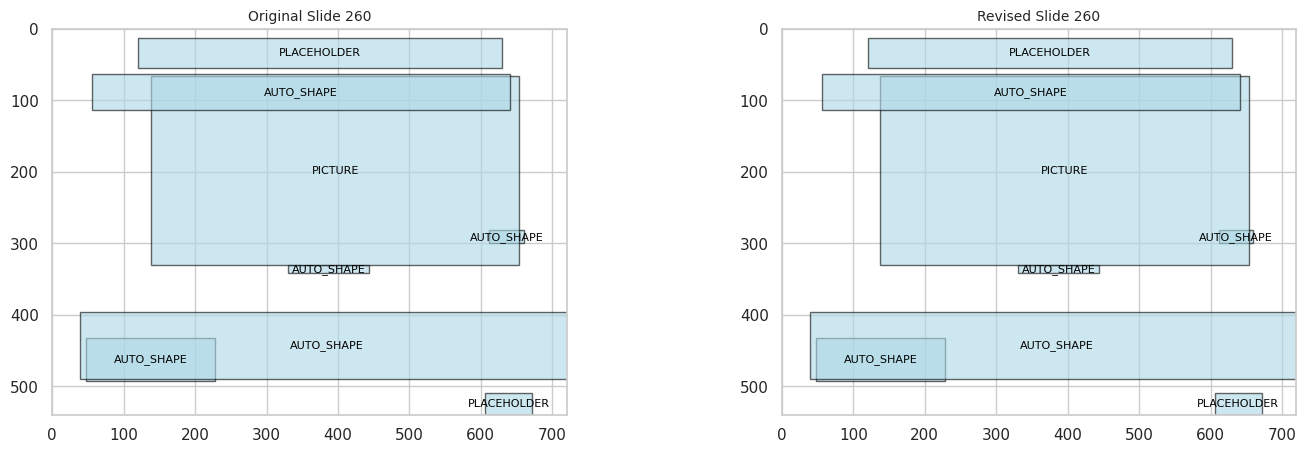

In [6]:
from pptlayout.visualizers.layout_visualizer import generate_comparison_grid

generate_comparison_grid(
    [info["slides"][4]],
    [json_data],
    slide_width=info["slide_width"],
    slide_height=info["slide_height"]
    )
    

In [5]:
from transformers import Qwen2VLForConditionalGeneration, AutoTokenizer, AutoProcessor
from qwen_vl_utils import process_vision_info
import os
model_dir = os.path.abspath("/data/share_weight/Qwen2-VL-7B-Instruct")

# default: Load the model on the available device(s)
model = Qwen2VLForConditionalGeneration.from_pretrained(
    model_dir, torch_dtype="auto", device_map="auto"
)

# We recommend enabling flash_attention_2 for better acceleration and memory saving, especially in multi-image and video scenarios.
# model = Qwen2VLForConditionalGeneration.from_pretrained(
#     model_dir,
#     torch_dtype=torch.bfloat16,
#     attn_implementation="flash_attention_2",
#     device_map="auto",
# )

# default processer
processor = AutoProcessor.from_pretrained(model_dir)

# The default range for the number of visual tokens per image in the model is 4-16384. You can set min_pixels and max_pixels according to your needs, such as a token count range of 256-1280, to balance speed and memory usage.
# min_pixels = 256*28*28
# max_pixels = 1280*28*28
# processor = AutoProcessor.from_pretrained(model_dir, min_pixels=min_pixels, max_pixels=max_pixels)
image_path = os.path.abspath("/data/tianyuhu/PPTLayout/notebooks/test_input/image.png")
messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "image": image_path,
            },
            {
                "type": "text", 
                "text": "What is the problem with the layout of this slide?",
            },
        ],
    }
]

# Preparation for inference
text = processor.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)
image_inputs, video_inputs = process_vision_info(messages)
inputs = processor(
    text=[text],
    images=image_inputs,
    videos=video_inputs,
    padding=True,
    return_tensors="pt",
)
inputs = inputs.to("cuda")

# Inference: Generation of the output
generated_ids = model.generate(**inputs, max_new_tokens=128)
generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
output_text = processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)
print(output_text)

Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

Some parameters are on the meta device because they were offloaded to the cpu.


['The layout of this slide is somewhat cluttered and lacks clear organization. The text is scattered around the image, making it difficult to read and understand the information presented. Additionally, the image of the NuMI baffle is not clearly visible due to the text overlay. The slide could be improved by using a more structured layout, with the text organized in a logical flow and the image placed in a way that it is easily visible and does not interfere with the text.']
